<h2>Preparation and Exploration</h2><br>

In [1]:
# Importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.metrics import roc_auc_score              # auc score
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import confusion_matrix           # confusion matrix
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


In [2]:
# Specifying file name
file = "./GOT_character_predictions.xlsx"

# loading data
GOT = pd.read_excel(file)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
GOT.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [3]:
# Printing column 
for column in GOT:
    print(column)

S.No
name
title
culture
dateOfBirth
mother
father
heir
house
spouse
book1_A_Game_Of_Thrones
book2_A_Clash_Of_Kings
book3_A_Storm_Of_Swords
book4_A_Feast_For_Crows
book5_A_Dance_with_Dragons
isAliveMother
isAliveFather
isAliveHeir
isAliveSpouse
isMarried
isNoble
age
numDeadRelations
popularity
isAlive


In [4]:
# Information about each vairables 
GOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Missing Values Analysis and Imputation</h2><br>

In [5]:
# Checking missing values from raw data
GOT.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [6]:
# User-defined functions

#########################
# Mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# Text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [7]:
# Pulling up data dictionary
GOT_description = pd.read_excel('./GOT_data_dictionary.xlsx')


# Displaying the data dictionary
GOT_description

,S.No,Character number (by order of appearance)
0,name,Character name
1,title,Honorary title(s) given to each character
2,male,"1 = male, 0 = female"
3,culture,Indicates the cultural group of a character
4,dateOfBirth,Known dates of birth for each character (measurement unknown)
5,mother,Character's biological mother
6,father,Character's biological father
7,heir,Character's biological heir
8,house,Indicates a character's allegiance to a house (i.e. a powerful family)
9,spouse,Character's spouse(s)


In [8]:
# Dropping post-event horizon features
GOT = GOT.drop(labels = ["S.No", "name", "dateOfBirth", "mother", 
                        "father", "isAliveMother", "isAliveFather",
                        "isAliveHeir", "isAliveSpouse"],
                         axis   = 1, inplace = False)


# Checking results
GOT.columns

Index(['title', 'culture', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive'], dtype='object')

In [9]:
# Checking each feature for missing values
GOT.isnull().sum(axis = 0)

title                         1008
culture                       1269
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [10]:
# Running the mv_flagger function
GOT = mv_flagger(df = GOT)


# checking results
GOT.columns

Index(['title', 'culture', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_heir', 'm_house', 'm_spouse', 'm_age'], dtype='object')

In [11]:
# Dropping categorical variables after they've been encoded
GOT = GOT.drop(['title', 'culture', 'heir', 'house', 'spouse', 'age'], axis = 1)


# Checking the results
GOT.columns

Index(['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isMarried', 'isNoble', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_heir', 'm_house', 'm_spouse', 'm_age'], dtype='object')

In [12]:
# Checking the head of the dataset
GOT.head()

,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isMarried,isNoble,numDeadRelations,popularity,isAlive,m_title,m_culture,m_heir,m_house,m_spouse,m_age
0,0,0,0,0,0,0,0,11,0.605351,0,1,1,0,1,1,1
1,1,1,1,1,1,1,1,1,0.896321,1,0,0,1,0,0,0
2,0,0,0,1,0,0,1,0,0.267559,1,0,1,1,0,1,1
3,0,0,0,0,0,1,1,0,0.183946,0,0,1,1,0,0,0
4,0,0,0,1,0,1,1,0,0.043478,1,0,0,1,0,0,0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Prepare for Classification</h2><br>

In [13]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.10,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Logistic Regression</h2><br>

In [14]:
# Correlation Analysis 
df_corr = GOT.corr().round(2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
m_age                         0.15
m_heir                        0.13
m_spouse                      0.05
m_title                       0.04
m_culture                     0.04
m_house                       0.04
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isNoble                      -0.04
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64

In [15]:
GOT.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

In [16]:
# Declaring explanatory variables
GOT_data = GOT.drop('isAlive', axis = 1)


# Declaring response variable
GOT_target = GOT.loc[ : , 'isAlive']

In [17]:
# Train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_target) # preserving balance


# Merging training data for statsmodels
GOT_train = pd.concat([x_train, y_train], axis = 1)

In [18]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [19]:
# Instantiating a logistic regression model object
logistic_small = smf.logit(formula = """isAlive ~ book4_A_Feast_For_Crows""",
                           data    = GOT_train)


# Fitting the model object
results_logistic = logistic_small.fit()


# Checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.534562
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.057     
Dependent Variable:  isAlive           AIC:               1876.0368 
Date:                2021-12-18 18:13  BIC:               1886.9727 
No. Observations:    1751              Log-Likelihood:    -936.02   
Df Model:            1                 LL-Null:           -992.53   
Df Residuals:        1749              LLR p-value:       2.1241e-26
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept               0.4601   0.0765  6.0172 0.0000 0.3102 0.6100
book4_A_Feast_For_Crows 1.1895   0.1141 10.4212 0.0000 0.9658 1.4132
====================================================================

"""

In [20]:
# Instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  isAlive ~
                                         book1_A_Game_Of_Thrones + 
                                         book2_A_Clash_Of_Kings + 
                                         book3_A_Storm_Of_Swords + 
                                         book4_A_Feast_For_Crows + 
                                         book5_A_Dance_with_Dragons + 
                                         isMarried + 
                                         isNoble + 
                                         numDeadRelations + 
                                         popularity + 
                                         m_title + 
                                         m_culture + 
                                         m_heir + 
                                         m_house + 
                                         m_spouse + 
                                         m_age""",
                                         data    = GOT_train)


# Fitting the model object
results_full = logistic_full.fit()


# Checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.492716
         Iterations 18


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Logit
=========================================================================================
Model:                      Logit                    Pseudo R-squared:         0.131     
Dependent Variable:         isAlive                  AIC:                      1757.4929 
Date:                       2021-12-18 18:13         BIC:                      1844.9800 
No. Observations:           1751                     Log-Likelihood:           -862.75   
Df Model:                   15                       LL-Null:                  -992.53   
Df Residuals:               1735                     LLR p-value:              1.3182e-46
Converged:                  1.0000                   Scale:                    1.0000    
No. Iterations:             18.0000                                                      
-----------------------------------------------------------------------------------------
                            Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
-----------------------------------------------------------------------------------------
Intercept                  -1.1517 1779201.4728 -0.0000 1.0000 -3487171.9596 3487169.6561
book1_A_Game_Of_Thrones    -0.5212       0.1593 -3.2717 0.0011       -0.8334      -0.2090
book2_A_Clash_Of_Kings     -0.2639       0.1423 -1.8547 0.0636       -0.5428       0.0150
book3_A_Storm_Of_Swords    -0.2659       0.1471 -1.8078 0.0706       -0.5542       0.0224
book4_A_Feast_For_Crows     1.6861       0.1531 11.0134 0.0000        1.3861       1.9862
book5_A_Dance_with_Dragons  0.0098       0.1457  0.0675 0.9462       -0.2758       0.2955
isMarried                  -0.6137 1779201.4728 -0.0000 1.0000 -3487171.4215 3487170.1942
isNoble                    -0.1065       0.4531 -0.2351 0.8141       -0.9946       0.7815
numDeadRelations           -0.0892       0.0504 -1.7677 0.0771       -0.1880       0.0097
popularity                 -0.5744       0.4963 -1.1572 0.2472       -1.5472       0.3984
m_title                     0.0508       0.4505  0.1127 0.9102       -0.8321       0.9337
m_culture                   0.0848       0.1322  0.6413 0.5213       -0.1743       0.3438
m_heir                      1.6803       0.6261  2.6838 0.0073        0.4532       2.9075
m_house                     0.3685       0.1612  2.2860 0.0223        0.0526       0.6843
m_spouse                   -0.5380 1779201.4728 -0.0000 1.0000 -3487171.3459 3487170.2698
m_age                       0.7746       0.1547  5.0068 0.0000        0.4714       1.0779
=========================================================================================

"""

In [21]:
for val in GOT_data:
    print(f" {val} + ")

 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isMarried + 
 isNoble + 
 numDeadRelations + 
 popularity + 
 m_title + 
 m_culture + 
 m_heir + 
 m_house + 
 m_spouse + 
 m_age + 


In [22]:
# Explanatory sets from last session

# Creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 
                   'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 
                   'book5_A_Dance_with_Dragons', 'isMarried',
                   'isNoble', 'numDeadRelations', 'popularity',
                   'm_title', 'm_culture', 'm_heir', 'm_house', 'm_spouse',
                   'm_age'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['book1_A_Game_Of_Thrones', 'book4_A_Feast_For_Crows', 
                   'numDeadRelations', 'popularity', 'm_age'],
}



In [23]:
# Printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}
""")



/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isMarried', 'isNoble', 'numDeadRelations', 'popularity', 'm_title', 'm_culture', 'm_heir', 'm_house', 'm_spouse', 'm_age']


First Significant p-value Model:
--------------------------------
['book1_A_Game_Of_Thrones', 'book4_A_Feast_For_Crows', 'numDeadRelations', 'popularity', 'm_age']



In [24]:
# Train/test split with the set 1 model
GOT_data   =  GOT.loc[ : , candidate_dict['logit_sig']]
GOT_target =  GOT.loc[ : , 'isAlive']

In [25]:
# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# Saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# Displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.779
LogReg Testing  ACCURACY: 0.8308
LogReg Train-Test Gap   : 0.0518


In [26]:
#####################
# Sample Solution 1 #
#####################

# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  isAlive ~
                                         book1_A_Game_Of_Thrones + 
                                         book4_A_Feast_For_Crows + 
                                         numDeadRelations + 
                                         popularity + 
                                         m_age""",
                                         data    = GOT_train)

# Fitting the model object
results_full = logistic_full.fit()


# Checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.498726
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.120     
Dependent Variable:   isAlive            AIC:                1758.5368 
Date:                 2021-12-18 18:13   BIC:                1791.3445 
No. Observations:     1751               Log-Likelihood:     -873.27   
Df Model:             5                  LL-Null:            -992.53   
Df Residuals:         1745               LLR p-value:        1.5856e-49
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -0.0093   0.1569 -0.0595 0.9526 -0.3169  0.2982
book1_A_Game_Of_Thrones -0.6066   0.1478 -4.1040 0.0000 -0.8963 -0.3169
book4_A_Feast_For_Crows  1.5207   0.1280 11.8845 0.0000  1.2699  1.7715
numDeadRelations        -0.0993   0.0491 -2.0228 0.0431 -0.1956 -0.0031
popularity              -1.2547   0.4411 -2.8446 0.0044 -2.1192 -0.3902
m_age                    0.7944   0.1479  5.3705 0.0000  0.5045  1.0843
=======================================================================

"""

In [27]:
# Creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 20  30]
 [  3 142]]


In [28]:
# Unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 20
False Positives: 30
False Negatives: 3
True Positives : 142



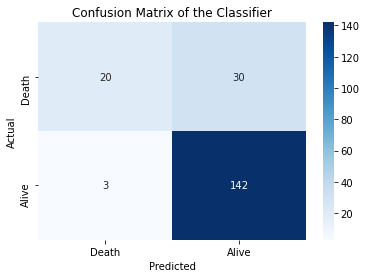

In [29]:
# Calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Death', 'Alive'])

In [30]:
# Area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# Saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6897


In [31]:
# Zipping each feature name to its coefficient
logreg_model_values = zip(GOT[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# Setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# Printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# Checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -0.0)
('book1_A_Game_Of_Thrones', -0.6)
('book4_A_Feast_For_Crows', 1.48)
('numDeadRelations', -0.11)
('popularity', -1.06)
('m_age', 0.78)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Classification Trees (CART Models)</h2><br>

In [32]:
########################################
# Plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    

In [33]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# Saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# Saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Tree Training ACCURACY: 0.8658
Tree Testing ACCURACY : 0.8308
Tree AUC Score: 0.7421


In [34]:
# Unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 28
False Positives: 22
False Negatives: 11
True Positives : 134



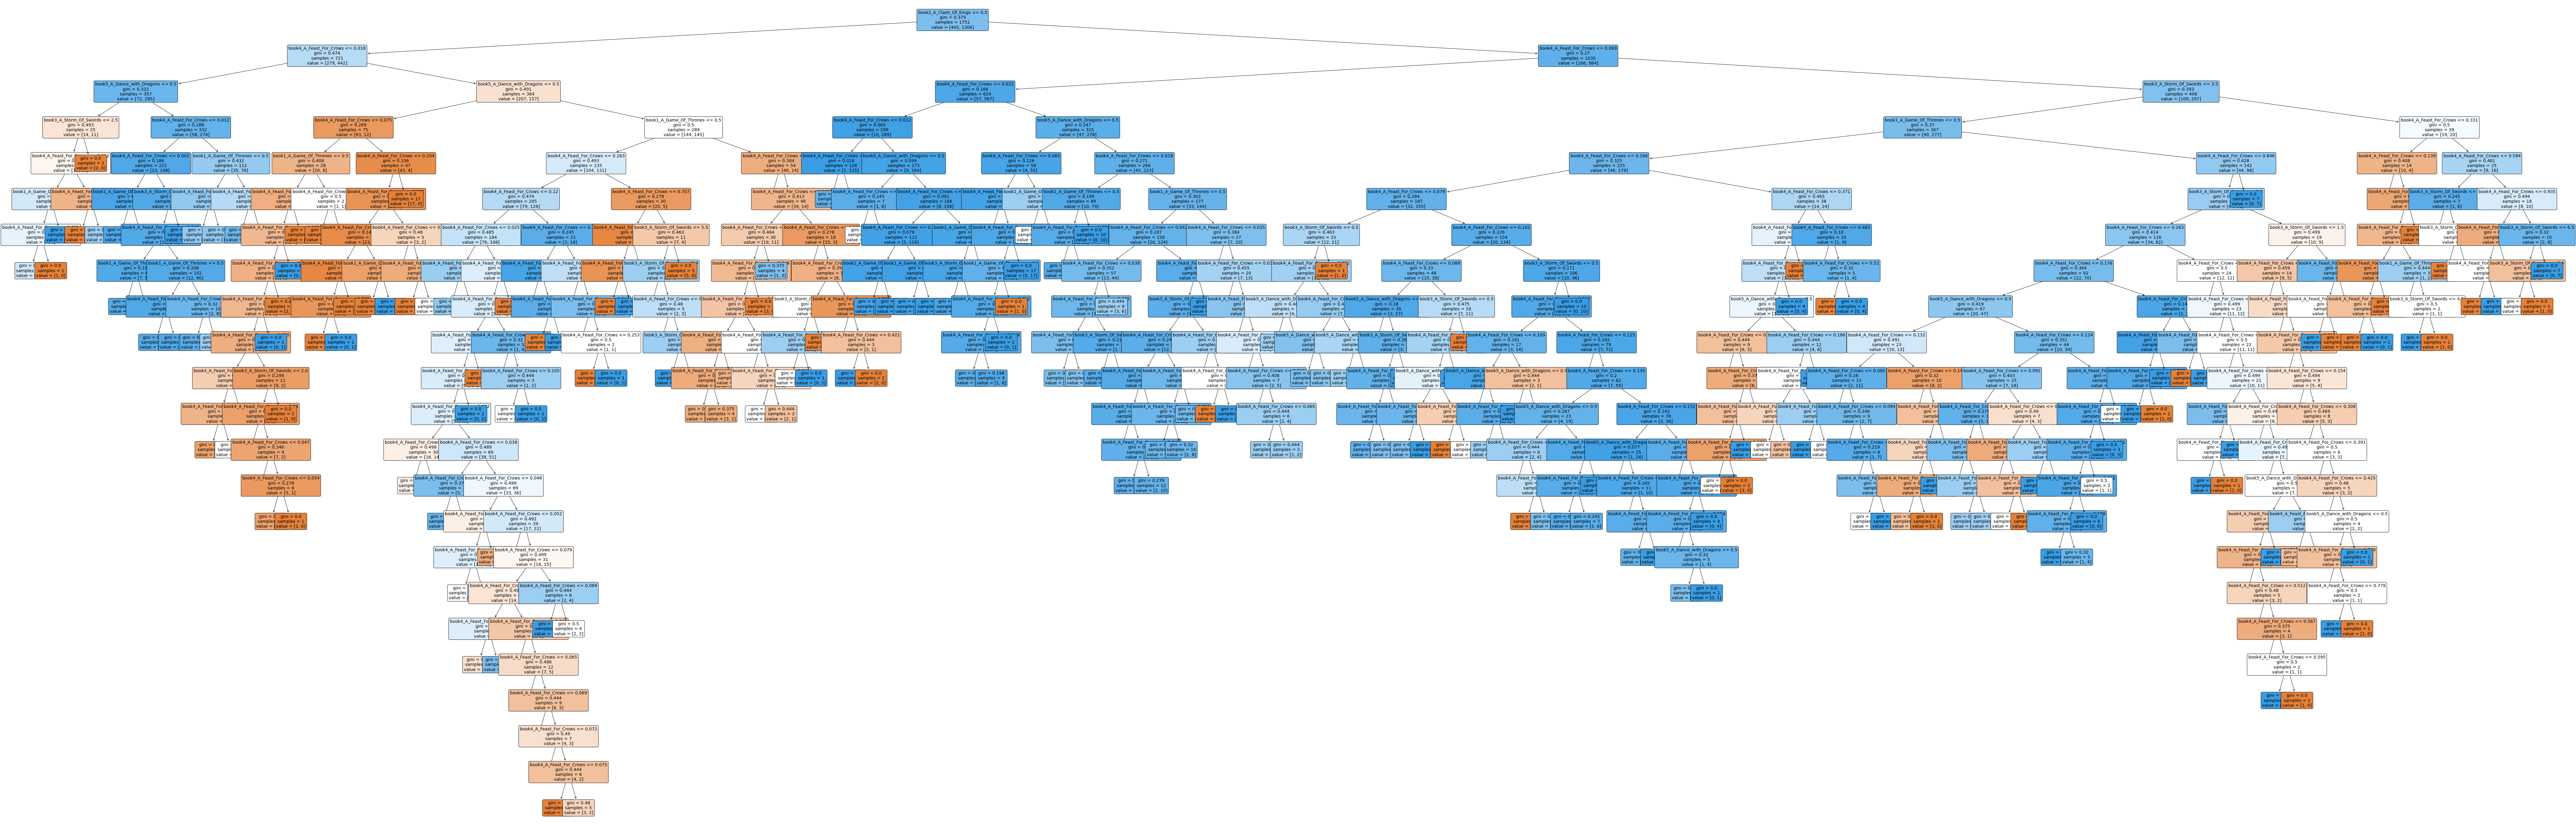

In [35]:
# Setting figure size
plt.figure(figsize=(150,50))


# Developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = GOT.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# Rendering the plot
plt.show()

In [36]:
# Develop a new classification tree object 
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 8,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# Saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# Saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.8041
Testing  ACCURACY: 0.8667
AUC Score        : 0.7466


In [37]:
# Unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 1
True Positives : 144



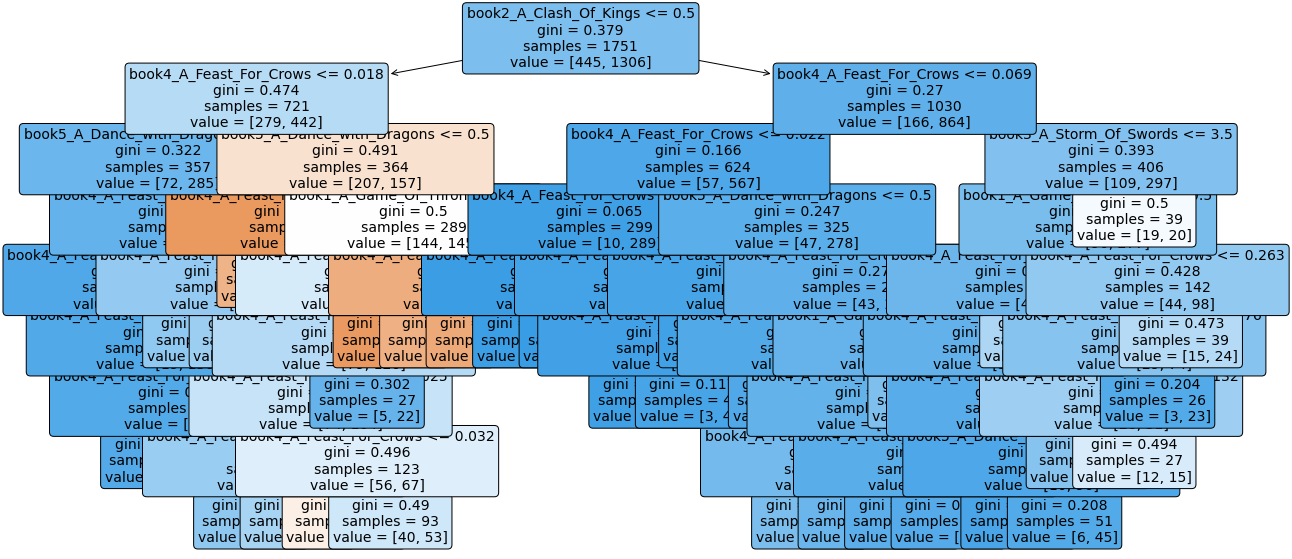

In [38]:
# Setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# Developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = GOT.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# Rendering the plot
plt.show()

NameError: name 'np' is not defined

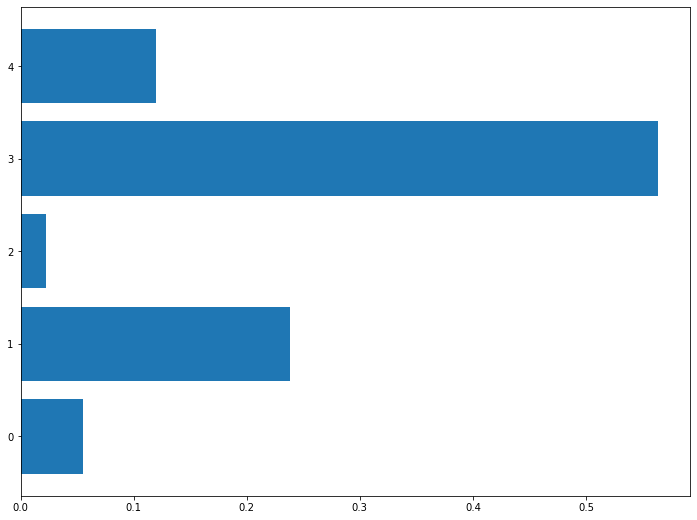

In [39]:
# Plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

In [40]:
# Comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# Creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# Converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)



Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6897         (20, 30, 3, 142)
Full Tree     0.7421           (28, 22, 11, 134)
Pruned Tree   0.7466         (25, 25, 1, 144)



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Classification Modeling with KNN</h2><br>

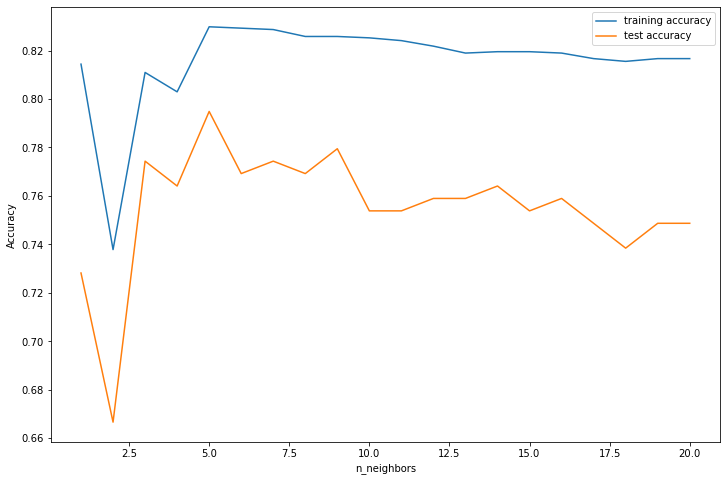

The optimal number of neighbors is: 5


In [41]:
# Determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = GOT_data,
                                  y_data        = GOT_target,
                                  response_type = 'class')

In [42]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(GOT_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(GOT_data)


# Converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# Train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# Saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# Saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.8104
Testing  ACCURACY: 0.8154
AUC Score        : 0.7514


In [43]:
# Unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 1
True Positives : 144



In [44]:
# Declaring model performance objects
knn_train_acc = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_acc  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)
knn_auc       = roc_auc_score(y_true  = y_test,
                              y_score = knn_pred).round(4)

# Appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'KNN ',
                           'Training Accuracy'  : knn_train_acc,
                           'Testing Accuracy'   : knn_test_acc,
                           'AUC Score'          : knn_auc,
                           'Confusion Matrix'   : (knn_tree_tn,
                                                   knn_tree_fp,
                                                   knn_tree_fn,
                                                   knn_tree_tp)},
                          ignore_index = True)


# Checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6897,0.7790,0.8308,"(20, 30, 3, 142)"
1,Full Tree,0.7421,0.8658,0.8308,"(28, 22, 11, 134)"
2,Pruned Tree,0.7466,0.8041,0.8667,"(25, 25, 1, 144)"
3,KNN,0.7514,0.8104,0.8154,"(31, 19, 17, 128)"


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Random Forest</h2><br>

In [46]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [47]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# Saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8361
Testing  ACCURACY: 0.8615
AUC Score        : 0.7497


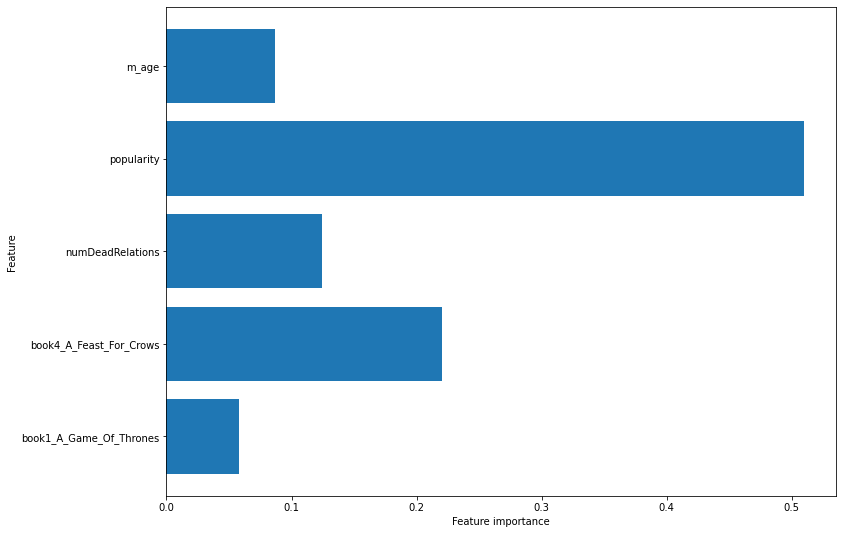

In [48]:
# Plotting feature importances
plot_feature_importances(model = rf_default_fit,
                        train = x_train,
                        export = False)

In [49]:
# Unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 3
True Positives : 142



In [50]:
# Declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# Appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest ',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# Checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6897,0.7790,0.8308,"(20, 30, 3, 142)"
1,Full Tree,0.7421,0.8658,0.8308,"(28, 22, 11, 134)"
2,Pruned Tree,0.7466,0.8041,0.8667,"(25, 25, 1, 144)"
3,KNN,0.7514,0.8104,0.8154,"(31, 19, 17, 128)"
4,Random Forest,0.7497,0.8361,0.8615,"(26, 24, 3, 142)"


In [51]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# Declaring a hyperparameter space
estimator_range  = np.arange(100, 1100, 250) 
leaf_range       = np.arange(1, 31, 10)
criterion_range  = ['gini', 'entropy']
bootstrap_range  = [True, False]
warm_start_range = [True, False]


# Creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid, #should change
                               param_distributions = param_grid,  #should change
                               cv         = 3,
                               n_iter     = 100,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(GOT_data, GOT_target)


# PREDICT step is not needed


# Printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

D:\Study\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 100, 'min_samples_leaf': 1, 'criterion': 'entropy', 'bootstrap': True}
Tuned Training AUC: 0.6747


In [52]:
# Best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(criterion='entropy', random_state=219, warm_start=True)

In [53]:
# Building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion='entropy', min_samples_leaf=1,
                       n_estimators=100, random_state=219, warm_start=True)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(GOT_data, GOT_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# Saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# Saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8641
Forest Tuned Testing  ACCURACY: 0.9179
Forest Tuned AUC Score        : 0.8466


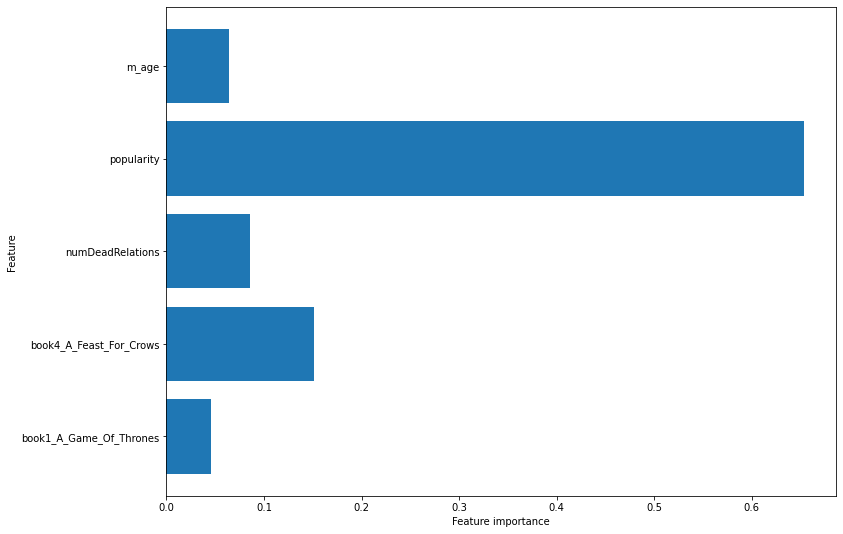

In [54]:
# Plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [55]:
# Unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 35
False Positives: 15
False Negatives: 1
True Positives : 144



In [56]:
# Declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# Appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# Checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6897,0.7790,0.8308,"(20, 30, 3, 142)"
1,Full Tree,0.7421,0.8658,0.8308,"(28, 22, 11, 134)"
2,Pruned Tree,0.7466,0.8041,0.8667,"(25, 25, 1, 144)"
3,KNN,0.7514,0.8104,0.8154,"(31, 19, 17, 128)"
4,Random Forest,0.7497,0.8361,0.8615,"(26, 24, 3, 142)"
5,Tuned Random Forest,0.8466,0.8641,0.9179,"(35, 15, 1, 144)"


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Gradient Boosted Machines</h2><br>

In [57]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 8,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8658
Testing ACCURACY : 0.8308
AUC Score        : 0.7355


In [58]:
# Unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 27
False Positives: 23
False Negatives: 10
True Positives : 135



In [59]:
# Declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# Appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# Checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6897,0.7790,0.8308,"(20, 30, 3, 142)"
1,Full Tree,0.7421,0.8658,0.8308,"(28, 22, 11, 134)"
2,Pruned Tree,0.7466,0.8041,0.8667,"(25, 25, 1, 144)"
3,KNN,0.7514,0.8104,0.8154,"(31, 19, 17, 128)"
4,Random Forest,0.7497,0.8361,0.8615,"(26, 24, 3, 142)"
5,Tuned Random Forest,0.8466,0.8641,0.9179,"(35, 15, 1, 144)"
6,GBM,0.7355,0.8658,0.8308,"(27, 23, 10, 135)"


In [60]:
# Declaring a hyperparameter space
learn_range        = np.arange(0.1, 2.2, 0.1)
estimator_range    = np.arange(100, 501, 100)
depth_range        = np.arange(2, 11, 1)
warm_start_range   = [True, False]

# Creating a hyperparameter grid
param_grid = {'learning_rate' : learn_range,
              'max_depth'     : depth_range,
              'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 250,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(GOT_data, GOT_target)


# PREDICT step is not needed


# Printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': True, 'max_depth': 2, 'learning_rate': 1.4000000000000001}
Tuned Training AUC: 0.679


In [61]:
# Checking the best estimator for the model
full_gbm_cv.best_estimator_

GradientBoostingClassifier(learning_rate=1.4000000000000001, max_depth=2,
                           random_state=219, warm_start=True)

In [62]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 1.4,
                                       max_depth     = 2,
                                       n_estimators  = 500,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(GOT_data, GOT_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.8418
Testing  ACCURACY: 0.8974
AUC Score        : 0.8393


In [63]:
# Unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 36
False Positives: 14
False Negatives: 6
True Positives : 139



In [64]:
# Declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# Appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# Checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6897,0.7790,0.8308,"(20, 30, 3, 142)"
1,Full Tree,0.7421,0.8658,0.8308,"(28, 22, 11, 134)"
2,Pruned Tree,0.7466,0.8041,0.8667,"(25, 25, 1, 144)"
3,KNN,0.7514,0.8104,0.8154,"(31, 19, 17, 128)"
4,Random Forest,0.7497,0.8361,0.8615,"(26, 24, 3, 142)"
5,Tuned Random Forest,0.8466,0.8641,0.9179,"(35, 15, 1, 144)"
6,GBM,0.7355,0.8658,0.8308,"(27, 23, 10, 135)"
7,Tuned GBM,0.8393,0.8418,0.8974,"(36, 14, 6, 139)"


In [65]:
# View each model's performance metrics
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
5,Tuned Random Forest,0.8466,0.8641,0.9179,"(35, 15, 1, 144)"
7,Tuned GBM,0.8393,0.8418,0.8974,"(36, 14, 6, 139)"
3,KNN,0.7514,0.8104,0.8154,"(31, 19, 17, 128)"
4,Random Forest,0.7497,0.8361,0.8615,"(26, 24, 3, 142)"
2,Pruned Tree,0.7466,0.8041,0.8667,"(25, 25, 1, 144)"
1,Full Tree,0.7421,0.8658,0.8308,"(28, 22, 11, 134)"
6,GBM,0.7355,0.8658,0.8308,"(27, 23, 10, 135)"
0,Logistic,0.6897,0.7790,0.8308,"(20, 30, 3, 142)"


The final model is the Tuned Random Forest Model. After analyzing the correlation, I decided to analyze the data based on book1_A_Game_Of_Thrones, book4_A_Feast_For_Crows, numDeadRelations, popularity, and m_age (for X-variables) and isAlive (for Y-vairable). I also ran with different models to get the AUC score and the gap between Training and Testing. I got 0.8466 for AUC score, and the gap between Training Accuracy and Testing Accuracy is 0.0538. 